### Importando as bibliotecas

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
from warnings import simplefilter 
import plotly.express as px

simplefilter("ignore")

### Carregando dataset

In [89]:
df = pd.read_csv('tabela5457.csv',sep=';',header=1)

### Eliminando NA's

In [90]:
df = df.dropna()

### Exibindo uma prévia do dataframe

In [91]:
df.head(10)

,Município,Produto das lavouras temporárias e permanentes,Ano,Variável,Unnamed: 4
0,Acopiara (CE),Abacate,2016.0,Valor da produção (Mil Reais),-
1,Acopiara (CE),Abacate,2017.0,Valor da produção (Mil Reais),-
2,Acopiara (CE),Abacate,2018.0,Valor da produção (Mil Reais),-
3,Acopiara (CE),Abacate,2019.0,Valor da produção (Mil Reais),-
4,Acopiara (CE),Abacate,2020.0,Valor da produção (Mil Reais),-
5,Acopiara (CE),Abacaxi*,2016.0,Valor da produção (Mil Reais),-
6,Acopiara (CE),Abacaxi*,2017.0,Valor da produção (Mil Reais),-
7,Acopiara (CE),Abacaxi*,2018.0,Valor da produção (Mil Reais),-
8,Acopiara (CE),Abacaxi*,2019.0,Valor da produção (Mil Reais),-
9,Acopiara (CE),Abacaxi*,2020.0,Valor da produção (Mil Reais),-


### Renomeando a coluna alvo

In [92]:
df = df.rename(columns = {'Unnamed: 4': 'Valor','Produto das lavouras temporárias e permanentes':'Produto'}, inplace = False)

### Eliminando dados inválidos da coluna alvo

In [93]:
df["Valor"].replace({"-": "0", "--": "0", "...":"0"}, inplace=True)

### Convertendo a coluna de valor para númerico

In [94]:
df["Valor"] = df[["Valor"]].apply(pd.to_numeric)

In [95]:
df["Ano"] = df["Ano"].astype(int)

### Filtrando apenas registros que possuam valor maior que zero

In [96]:
df = df[df.Valor > 0]

In [97]:
df

,Município,Produto,Ano,Variável,Valor
26,Acopiara (CE),Algodão herbáceo (em caroço),2017,Valor da produção (Mil Reais),10
27,Acopiara (CE),Algodão herbáceo (em caroço),2018,Valor da produção (Mil Reais),147
28,Acopiara (CE),Algodão herbáceo (em caroço),2019,Valor da produção (Mil Reais),389
29,Acopiara (CE),Algodão herbáceo (em caroço),2020,Valor da produção (Mil Reais),736
44,Acopiara (CE),Arroz (em casca),2020,Valor da produção (Mil Reais),7
...,...,...,...,...,...
10565,Tauá (CE),Milho (em grão),2016,Valor da produção (Mil Reais),2421
10566,Tauá (CE),Milho (em grão),2017,Valor da produção (Mil Reais),2212
10567,Tauá (CE),Milho (em grão),2018,Valor da produção (Mil Reais),3637
10568,Tauá (CE),Milho (em grão),2019,Valor da produção (Mil Reais),5177


### Analisando o valor da produção Por Produto

In [98]:
df[['Produto','Valor']].groupby(['Produto']).sum().sort_values(by=['Valor','Produto'],ascending=False)

,Valor
Produto,
Milho (em grão),486890
Feijão (em grão),405088
Tomate,18415
Mandioca,12205
Banana (cacho),12181
Cana-de-açúcar,8948
Algodão herbáceo (em caroço),8272
Castanha de caju,7323
Fava (em grão),6883


In [99]:
round(df[['Produto','Valor']].groupby(['Produto']).sum().sort_values(by=['Valor','Produto'],ascending=False) / 
df[['Valor']].sum(),2) * 100

,Valor
Produto,
Milho (em grão),49.0
Feijão (em grão),41.0
Tomate,2.0
Mandioca,1.0
Banana (cacho),1.0
Cana-de-açúcar,1.0
Algodão herbáceo (em caroço),1.0
Castanha de caju,1.0
Fava (em grão),1.0


Baseado nas extrações acima, podemos concluir que dentro da Mesorregião Sertões Cearenses, considerando o período analisado (últimos cinco anos), a cultura com o maior valor produzido foi a do Milho(em Grão) representando <b>49%</b> de toda a produção.

Outro dado interessante é que as duas principais culturas já respondem por <b>90%</b> de todo o valor produzido no últimos cinco anos.

### Analisando os maiores produtores por Ano x Município

In [100]:
df_2 = df.groupby(['Município','Ano','Produto']).sum().sort_values(by=['Município','Valor','Produto'],ascending=False)

In [101]:
df_2

Valor
Município     Ano  Produto                
Tauá (CE)     2020 Milho (em grão)   12503
                   Feijão (em grão)   5688
              2019 Milho (em grão)    5177
                   Feijão (em grão)   3694
              2018 Milho (em grão)    3637
...                                    ...
Acopiara (CE) 2020 Castanha de caju      4
              2018 Castanha de caju      3
              2019 Castanha de caju      3
              2016 Castanha de caju      2
              2017 Castanha de caju      2

[1349 rows x 1 columns]

### Gerando um conjunto de Municípios

In [102]:
mun = set(list(df['Município'].values))

In [103]:
mun

{'Acopiara (CE)',
 'Aiuaba (CE)',
 'Ararendá (CE)',
 'Arneiroz (CE)',
 'Banabuiú (CE)',
 'Boa Viagem (CE)',
 'Catarina (CE)',
 'Choró (CE)',
 'Crateús (CE)',
 'Deputado Irapuan Pinheiro (CE)',
 'Ibaretama (CE)',
 'Independência (CE)',
 'Ipaporanga (CE)',
 'Madalena (CE)',
 'Milhã (CE)',
 'Mombaça (CE)',
 'Monsenhor Tabosa (CE)',
 'Nova Russas (CE)',
 'Novo Oriente (CE)',
 'Parambu (CE)',
 'Pedra Branca (CE)',
 'Piquet Carneiro (CE)',
 'Quiterianópolis (CE)',
 'Quixadá (CE)',
 'Quixeramobim (CE)',
 'Saboeiro (CE)',
 'Senador Pompeu (CE)',
 'Solonópole (CE)',
 'Tamboril (CE)',
 'Tauá (CE)'}

### Iterando sobre os dados para listar o ranking de produtos por municípios

In [104]:
df_produto_x_mun = df[['Produto','Município','Valor']].groupby(['Produto','Município']).sum().reset_index().sort_values(by='Valor',ascending=False)

In [ ]:
df_produto_x_mun[["Produto", "Valor"]].groupby("Produto").sum().reset_index()

In [135]:
df_valor_total_por_produto = df_produto_x_mun[["Produto", "Valor"]].groupby("Produto").sum().reset_index()

In [144]:
df_valor_total_por_produto.head()

,Produto,Valor
0,Algodão herbáceo (em caroço),8272
1,Amendoim (em casca),10
2,Arroz (em casca),182
3,Banana (cacho),12181
4,Batata-doce,4463


In [140]:
fig = px.bar(df_valor_total_por_produto.sort_values("Valor", ascending=False), 
             y='Valor', 
             x='Produto', 
             title="PRODUTOS MAIS PRODUZIDOS ORDENADOS POR VALOR DO PRODUTO")
fig.show()

In [141]:
df_valor_total_por_municipio = df_produto_x_mun[["Município", "Valor"]].groupby("Município").sum().reset_index()

In [150]:
fig = px.bar(df_valor_total_por_municipio.sort_values("Valor", ascending=False), 
             y='Valor', 
             x='Município', 
             title="LOCALIDADES QUE MAIS PRODUZEM")
fig.show()

In [106]:
df_total = pd.DataFrame()
for municipio in df_produto_x_mun['Município'].unique():
    df_total = df_total.append(df_produto_x_mun[df_produto_x_mun['Município'] == municipio].sort_values('Valor').head(3))

df_total.sort_values(['Município','Valor'],ascending=False)

,Produto,Município,Valor
261,Manga,Tauá (CE),137
20,Algodão herbáceo (em caroço),Tauá (CE),92
105,Castanha de caju,Tauá (CE),6
83,Cana-de-açúcar,Tamboril (CE),29
130,Coco-da-baía*,Tamboril (CE),29
...,...,...,...
267,Melancia,Aiuaba (CE),18
188,Mamona (baga),Aiuaba (CE),4
85,Castanha de caju,Acopiara (CE),14
132,Fava (em grão),Acopiara (CE),12


In [149]:
fig = px.bar(df_total.sort_values(['Município','Valor'], ascending=False), 
             x="Município", y="Valor", color="Produto", 
             title="VALOR DOS 3 PRODUTOS MAIS CAROS AGRUPADOS POR MUNICIPIO E PRODUTOS")
fig.show()

### Plota a série temporal do valor dos produtos ao longo do tempo

In [107]:
minimo = df['Ano'].min()
maximo = df['Ano'].max()

In [108]:
df_anual = df[['Ano','Valor']].groupby('Ano').sum().reset_index()

In [109]:
df_anual['Ano'] = pd.date_range(start=pd.datetime(minimo , 1, 1), periods=(maximo - minimo) + 1, freq="A")

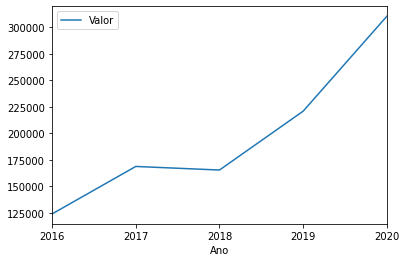

In [110]:
df_anual.set_index("Ano").plot();

In [111]:
columns_select = ["Município", "Produto", "Ano", "Valor", ]
columns_groupby = ["Município", "Produto", "Ano",]

In [112]:
custo_total_por_municipio_produto_e_ano["Z-SCORE"] = (custo_total_por_municipio_produto_e_ano.Valor - media) /  desvio_padrao
custo_total_por_municipio_produto_e_ano["% COEF_VAR"] = (desvio_padrao / media) * 100
custo_total_por_municipio_produto_e_ano["% DISTANCIA_DA_MEDIA"] = (1 - (desvio_padrao / media)) * 100

In [113]:
custo_total_por_municipio_produto_e_ano = df[columns_select].groupby(columns_groupby).sum().reset_index().sort_values("Valor", ascending=False)

In [131]:
custo_total_por_municipio_produto_e_ano.sort_values(["Município", "Valor"], ascending=False)

,Município,Produto,Ano,Valor
1348,Tauá (CE),Milho (em grão),2020,12503
1328,Tauá (CE),Feijão (em grão),2020,5688
1347,Tauá (CE),Milho (em grão),2019,5177
1327,Tauá (CE),Feijão (em grão),2019,3694
1346,Tauá (CE),Milho (em grão),2018,3637
...,...,...,...,...
19,Acopiara (CE),Castanha de caju,2020,4
18,Acopiara (CE),Castanha de caju,2019,3
17,Acopiara (CE),Castanha de caju,2018,3
16,Acopiara (CE),Castanha de caju,2017,2


In [115]:
columns_select = ["Município", "Ano", "Valor", ]
columns_groupby = ["Município", "Ano", ]

In [116]:
custo_total_por_municipio_e_ano = df[columns_select].groupby(columns_groupby).sum().reset_index().sort_values("Valor", ascending=False)

In [117]:
media =custo_total_por_municipio_e_ano.Valor.mean()
desvio_padrao = custo_total_por_municipio_e_ano.Valor.std() 

custo_total_por_municipio_e_ano["Z-SCORE"] = (custo_total_por_municipio_e_ano.Valor - media) /  desvio_padrao
custo_total_por_municipio_e_ano["% COEF_VAR"] = (desvio_padrao / media) * 100
custo_total_por_municipio_e_ano["% DISTANCIA_DA_MEDIA"] = (1 - (desvio_padrao / media)) * 100

In [118]:
custo_total_por_municipio_e_ano

,Município,Ano,Valor,Z-SCORE,% COEF_VAR,% DISTANCIA_DA_MEDIA
43,Crateús (CE),2019,30003,3.872057,91.620429,8.379571
144,Tamboril (CE),2020,28532,3.628703,91.620429,8.379571
44,Crateús (CE),2020,25688,3.158209,91.620429,8.379571
41,Crateús (CE),2017,24672,2.990128,91.620429,8.379571
29,Boa Viagem (CE),2020,22017,2.550901,91.620429,8.379571
...,...,...,...,...,...,...
30,Catarina (CE),2016,792,-0.960436,91.620429,8.379571
16,Arneiroz (CE),2017,727,-0.971189,91.620429,8.379571
126,Saboeiro (CE),2017,678,-0.979295,91.620429,8.379571
128,Saboeiro (CE),2019,486,-1.011059,91.620429,8.379571
